In [8]:
c = pd.read_csv("../misc_files/crossovers_distance2features.tsv", sep="\t")
gsizes = pd.read_csv("../misc_files/corn.genome",sep="\t",header=None).set_index(0).to_dict()[1]

In [16]:
c["midpoint"] = [np.mean([r.start, r.end]) for i,r in c.iterrows()]
c["height"] = 1

In [44]:
uscafs = list(c.scaf.unique())
uscafs_l = pd.DataFrame([uscafs, [gsizes[s] for s in uscafs]]).transpose()
uscafs = list(uscafs_l.sort_values(by=1).reset_index()[0])

In [46]:
c["iscaf"] = [uscafs.index(scaf) for scaf in c.scaf]

(29.0, 59.0)

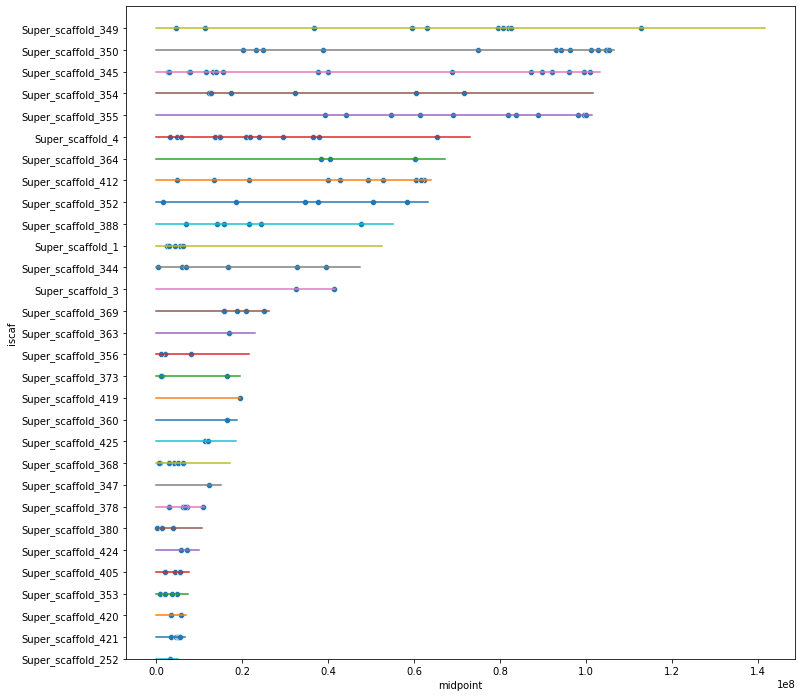

In [64]:
f,ax = plt.subplots(figsize=[12,12])
sns.scatterplot(data=c, x="midpoint", y="iscaf",ax=ax)
for i,scaf in enumerate(uscafs):
    ax.plot([0, gsizes[scaf]], [i,i])
ax.set_yticks(range(len(uscafs)))
ax.set_yticklabels(uscafs)
ax.set_ylim([29, 59])

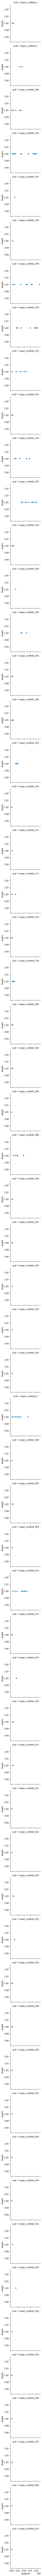

In [17]:
#g = sns.FacetGrid(data=c, row="scaf")
#g.map(sns.scatterplot, "midpoint", "height")